In [1]:
# Importing required libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

df = pd.read_csv('./Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [2]:
# Removing the first column as this column is not useful for us in further processing.

df = df.drop(columns=df.columns[0], axis=1)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
# Encoding all the categorical variables into integers.
df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
df["airline"] = df["airline"].replace({'Indigo':0, 'AirAsia':1, 'GO_FIRST':2, 'SpiceJet':3, 'Air_India':4, 'Vistara':5})
df['source_city'] = df['source_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['destination_city'] = df['destination_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['departure_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
df['arrival_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16352\908060521.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16352\908060521.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
C:\Users\Aryan\AppData\Local\Temp\ipykernel_16352\908060521.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To

In [4]:
# Excluding the below columnns from the Training and Testing data.
columns_to_exclude = ['flight', 'price']

# Creating a new DataFrame for the Training data and Testing data.
x = df.drop(columns=columns_to_exclude)
y = df[['price']]

In [5]:
# Selected features for training.
x

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,3,0,4,0,4,1,0,2.17,1
1,3,0,1,0,1,1,0,2.33,1
2,1,0,1,0,1,1,0,2.17,1
3,5,0,2,0,2,1,0,2.25,1
4,5,0,2,0,2,1,0,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,5,2,1,2,4,1,10.08,49
300149,5,5,3,1,3,4,1,10.42,49
300150,5,5,1,1,1,4,1,13.83,49
300151,5,5,1,1,1,4,1,10.00,49


### Decision Tree Regressor

In [6]:
selection = ExtraTreesRegressor()
selection.fit(x, y)

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [7]:
# Finding the importance of each input feature.
print('Feature: Importance')
for feature_name, feature_importance in zip(x.columns, selection.feature_importances_):
    print(f"{feature_name}: {feature_importance}")

Feature: Importance
airline: 0.011641706401766207
source_city: 0.010748955819916266
departure_time: 0.0032498817584258443
stops: 0.03347485080398269
arrival_time: 0.0031966911025335405
destination_city: 0.010057341069159476
class: 0.8805652621955765
duration: 0.02899368891865145
days_left: 0.01807162192998808


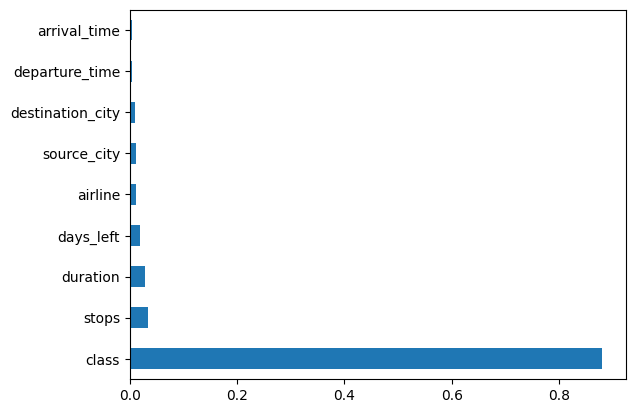

In [8]:
# Visualising the importance of each feature.
feat_importances = pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

From the above graph, we can infer that the class feature has the highest importance among all the features, with an importance score of approximately 0.88. This suggests that the class of the flight (Economy or Business) is the most influential factor in predicting airfare prices according to the Decision Tree Algorithm. Other features such as stops, duration, and days_left also have notable importance values, indicating that they contribute to predicting airfare prices, albeit to a lesser extent compared to the class feature.

Moreover, features like departure_time, arrival_time, airline, source_city, and destination_city have relatively lower importance values, suggesting that they have less impact on predicting airfare prices according to your model and are insignificant to the Decision Tree Learning Algorithm.

In [9]:
# Splitting the dataset into Training and Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
# Fitting and Training the model.
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [11]:
# Evaulating the performace of the model on the Training data.
y_pred = dtree.predict(x_test)
dtree.score(x_train,y_train)

0.9990995187322576

In [12]:
# Evaulating the performace of the model on the Testing data.
dtree.score(x_test,y_test)

0.9758909566551721

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16352\737030646.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)


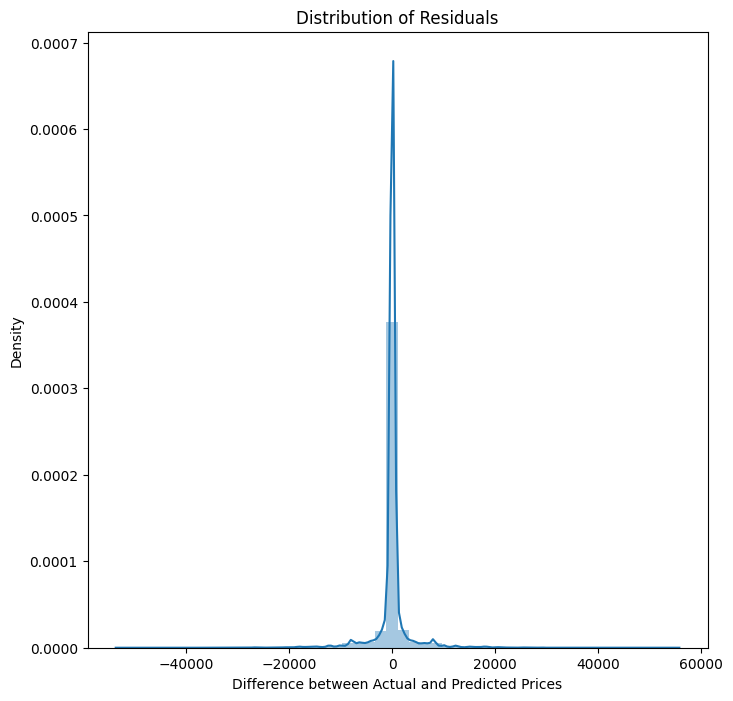

In [13]:
# Visualising the difference between Actual and Predicted Prices.
y_test = y_test.values.flatten() if hasattr(y_test, 'values') else y_test
y_pred = y_pred.flatten() if hasattr(y_pred, 'flatten') else y_pred

plt.figure(figsize=(8, 8))
sns.distplot(y_test - y_pred)
plt.xlabel('Difference between Actual and Predicted Prices')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()


The above graph is a density plot that visualizes the distribution of residuals, which are the differences between actual and predicted prices. Residuals are a common way to evaluate the accuracy of predictive models; they are essentially the errors between what the model predicts and what the actual values are. This density plot shows a very sharp peak around zero, indicating that most of the residuals are very close to zero, which implies that the predictions are mostly accurate. However, there are tails that extend to the left and right, suggesting that there are some predictions that were quite a bit higher or lower than the actual prices. The sharpness of the peak might also suggest that the residuals are not normally distributed, as a normal distribution would show a more bell-shaped curve.

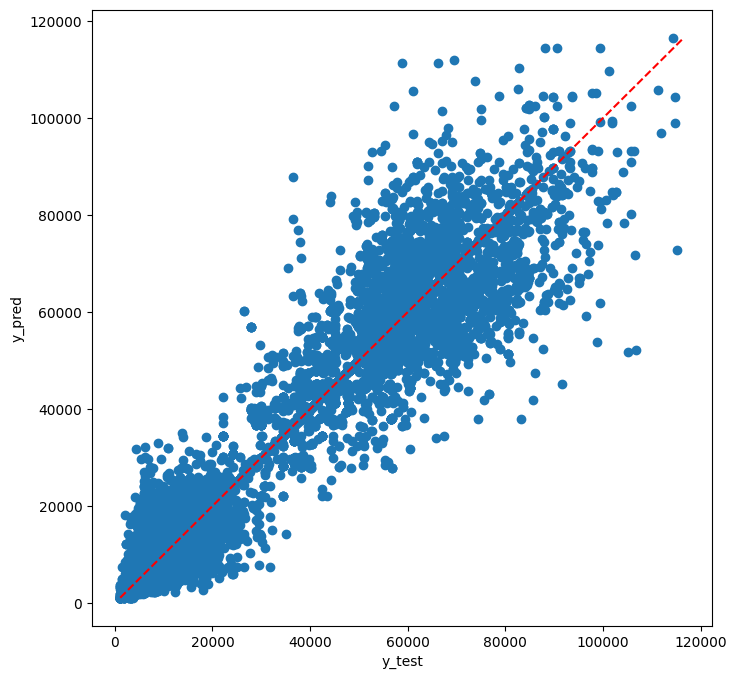

In [14]:
# Visualising the difference between Actual and Predicted Prices.
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

# Here, we are adding the y = x line in red color to observe the variation between the Actual Price and Predicted Price.
max_val = max(max(y_test.squeeze()), max(y_pred.squeeze()))
min_val = min(min(y_test.squeeze()), min(y_pred.squeeze()))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

The red dashed line on the above plot is the line of perfect prediction, where the predicted values would equal the actual values. If every prediction was perfect, all the points would fall on this line. As you can observe, most points seem to cluster around the line of perfect prediction, which suggests that the model has a good level of predictive accuracy. There are some points that are far from the line of perfect prediction, indicating outliers or extreme values where the model did not predict accurately. Often, these points indicate some extreme or exceptional situation.

In [15]:
# Evaluating the model.
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:", metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1198.497745609213
MSE: 12427784.476962367
RMSE: 3525.3062954816232


## Conclusion

Based on the above graphs and evaluation metrics, we can infer that while the model seems to perform reasonably well (as shown by the concentration of points around the line of perfect prediction), it does have instances where the predictions are quite far off, especially with larger values. This is indicated by the high MSE and RMSE, which indicate a greater penalty for these large errors. While this is a decent model with good predictions, we can still do better by trying various Machine Learning algorithms as well.